# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

### Group 1

In [0]:
# !pip install networkx
# !pip install -U turicreate

In [0]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("drive/Team Drives/BigData/hw4")

In [0]:
import turicreate as tc
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

## Reddit Networks
Using the [Reddit networks dataset],(http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

In [0]:
sg = tc.load_sgraph('PrisonBreak.2011-11-13.2016-10-31.sgraph')

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [0]:
degree = tc.degree_counting.create(sg)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Total Degree of top 60 Vetrices in the Prison Break subreddit network')

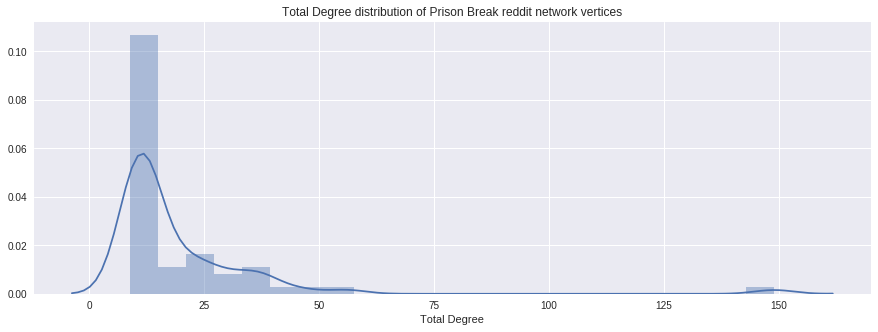

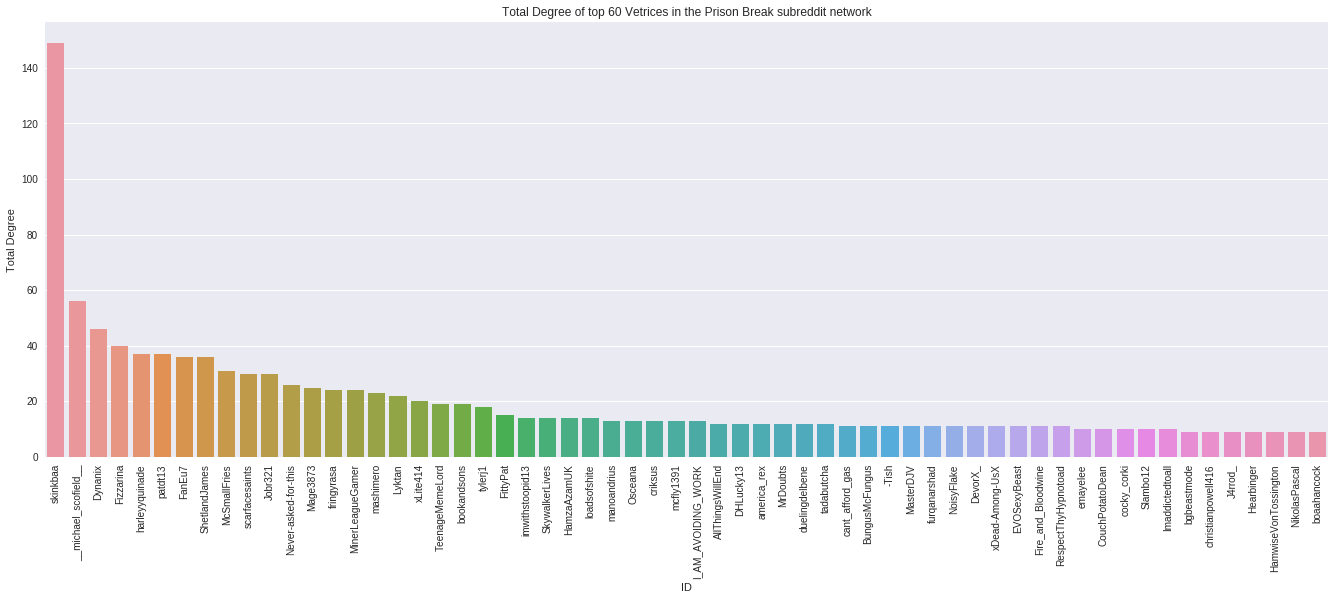

In [0]:
# degree distribution
plt.figure(figsize=(15,5))
sg.vertices['total degree'] = degree['graph'].vertices['total_degree']
df_degree = sg.vertices.sort('total degree', ascending=False)['__id', 'total degree'].to_dataframe().head(60)
sns.distplot(df_degree['total degree'])
plt.xlabel('Total Degree')
plt.title('Total Degree distribution of Prison Break reddit network vertices')

# degree bar plot
plt.figure(figsize=(23,8))
plt.xticks(rotation=90)
sns.barplot(x="__id", y="total degree", data=df_degree)
plt.xlabel('ID')
plt.ylabel('Total Degree')
plt.title('Total Degree of top 60 Vetrices in the Prison Break subreddit network')

**Task 2:** Create a subgraph of the top-20 users according to the PageRank algorithm. Draw the subgraph (15pt)

In [0]:
pr = tc.pagerank.create(sg)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 1101.66               |

| 2         | 322.231               |

| 3         | 133.855               |

| 4         | 70.9345               |

| 5         | 42.8815               |

| 6         | 28.0753               |

| 7         | 19.4179               |

| 8         | 13.5913               |

| 9         | 10.0721               |

| 10        | 7.4377                |

| 11        | 5.69944               |

| 12        | 4.35567               |

| 13        | 3.40046               |

| 14        | 2.65152               |

| 15        | 2.09295               |

| 16        | 1.65467               |

| 17        | 1.32214               |

| 18        | 1.0571                |

| 19        | 0.853405              |

| 20        | 0.688485              |

+-----------+-----------------------+

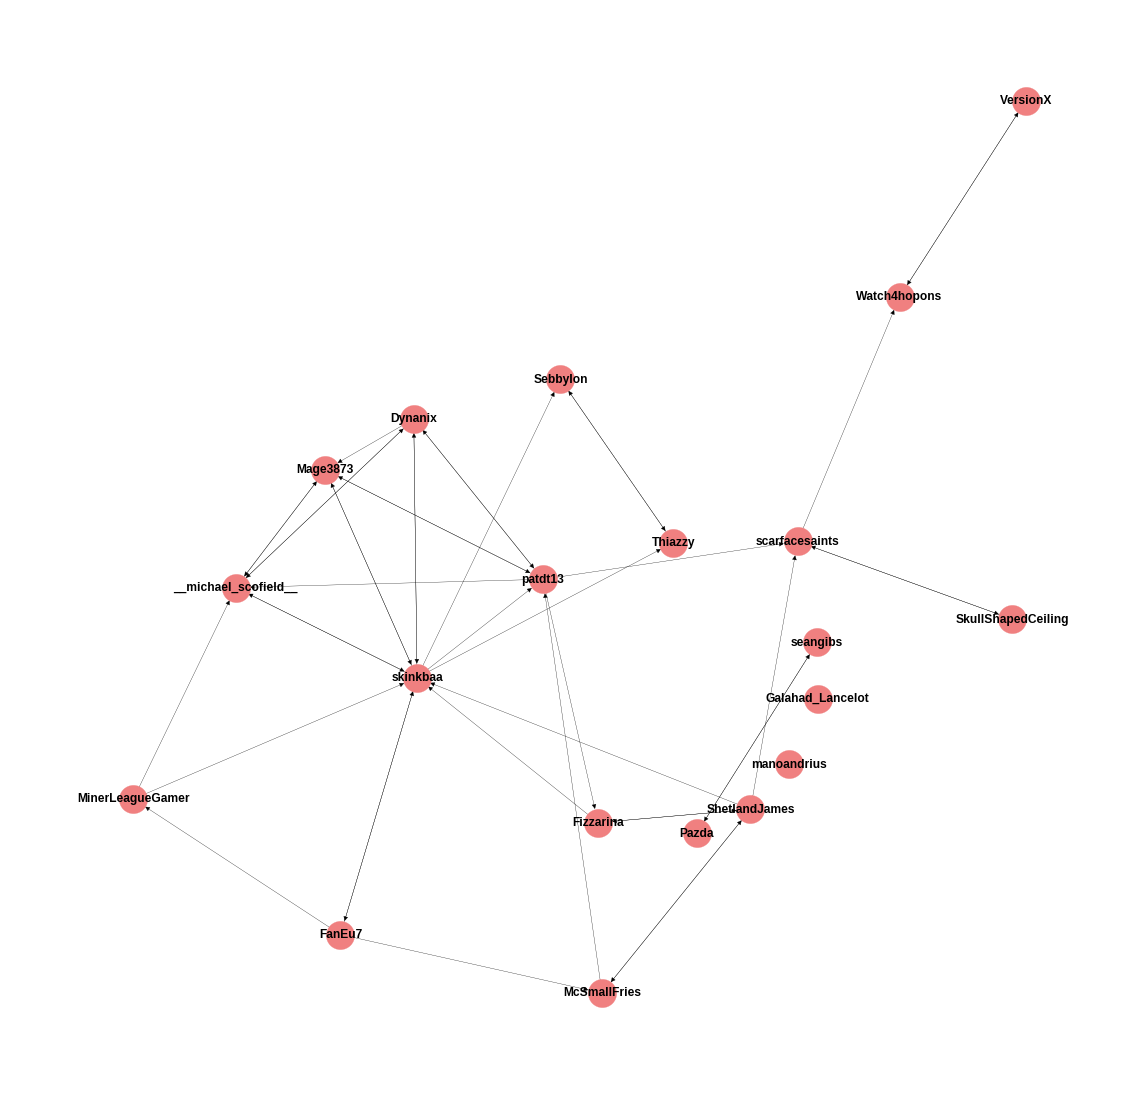

In [0]:
def sgraph2nxDigraph(sgraph):
    nx_g = nx.DiGraph()
    nx_g.add_nodes_from(sgraph.vertices['__id'])
    nx_g.add_edges_from(sgraph.edges[['__src_id', '__dst_id']].apply(lambda row: [v for (k,v) in row.items()]))
    return nx_g


sg.vertices['pagerank'] = pr['graph'].vertices['pagerank']
pagerank_top20 = sg.vertices[['__id', 'pagerank']].sort(key_column_names="pagerank", ascending=False).head(20)
ng = sgraph2nxDigraph(sg)
ng_top20 = ng.subgraph(pagerank_top20['__id'])
plt.figure(figsize=(15,15))
nx.draw_kamada_kawai(ng_top20, with_labels=True, node_size = 800, font_weight=1000, width=0.3, node_color='lightcoral')

**Task 3:** Calculate the degree, triangles, and average shortest path of each vertex in the graph (15pt)

In [0]:
sg.vertices['in_degree'] = degree['graph'].vertices['in_degree']
sg.vertices['out_degree'] = degree['graph'].vertices['out_degree']

triangles = tc.triangle_counting.create(sg)
sg.vertices['triangle_count'] = triangles['graph'].vertices['triangle_count']

sp_avg = []
for vertex in sg.vertices['__id']:
    sp = tc.shortest_path.create(sg, source_vid=vertex)
    sp_avg.append(sp['distance']['distance'].mean())

sg.vertices['average shortest path'] = sp_avg

Initializing vertex ids.

Removing duplicate (bidirectional) edges.

Counting triangles...

Finished in 2.76159 secs.

Total triangles in the graph : 157

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 189                        |

| 305                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 224                        |

| 275                        |

| 59                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 187                        |

| 306                        |

| 53                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 236                        |

| 273                        |

| 41                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 323                        |

| 215                        |

| 41                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 351                        |

| 250                        |

| 33                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 99                         |

| 348                        |

| 99                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 121                        |

| 336                        |

| 74                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 19                         |

| 361                        |

| 210                        |

| 36                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 127                        |

| 331                        |

| 78                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 14                         |

| 329                        |

| 208                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 160                        |

| 350                        |

| 82                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 222                        |

| 283                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 13                         |

| 329                        |

| 209                        |

| 28                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 121                        |

| 330                        |

| 89                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 121                        |

| 330                        |

| 89                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 313                        |

| 261                        |

| 38                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 310                        |

| 226                        |

| 44                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 344                        |

| 243                        |

| 37                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 222                        |

| 283                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 186                        |

| 374                        |

| 142                        |

| 28                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 21                         |

| 358                        |

| 168                        |

| 23                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 117                        |

| 331                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 73                         |

| 341                        |

| 118                        |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 50                         |

| 398                        |

| 235                        |

| 27                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 77                         |

| 337                        |

| 119                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 260                        |

| 303                        |

| 56                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 17                         |

| 298                        |

| 226                        |

| 34                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 7                          |

| 28                         |

| 323                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 261                        |

| 285                        |

| 38                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 125                        |

| 365                        |

| 96                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 182                        |

| 307                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 306                        |

| 236                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 22                         |

| 356                        |

| 165                        |

| 23                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 153                        |

| 353                        |

| 85                         |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 276                        |

| 273                        |

| 63                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 4                          |

| 256                        |

| 300                        |

| 77                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 212                        |

| 285                        |

| 60                         |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 186                        |

| 337                        |

| 97                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 259                        |

| 303                        |

| 57                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 306                        |

| 236                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 340                        |

| 229                        |

| 41                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 141                        |

| 348                        |

| 84                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 262                        |

| 301                        |

| 56                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 182                        |

| 307                        |

| 56                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 14                         |

| 50                         |

| 372                        |

| 172                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 265                        |

| 300                        |

| 54                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 35                         |

| 323                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 133                        |

| 353                        |

| 107                        |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 3                          |

| 139                        |

| 319                        |

| 67                         |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 344                        |

| 240                        |

| 37                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 3                          |

| 33                         |

| 317                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 228                        |

| 275                        |

| 59                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 327                        |

| 199                        |

| 25                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 247                        |

| 278                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 50                         |

| 399                        |

| 235                        |

| 27                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 108                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 114                        |

| 330                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 154                        |

| 353                        |

| 85                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 154                        |

| 353                        |

| 85                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 317                        |

| 238                        |

| 34                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 344                        |

| 241                        |

| 36                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 172                        |

| 357                        |

| 82                         |

| 12                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 53                         |

| 400                        |

| 281                        |

| 109                        |

| 18                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 104                        |

| 346                        |

| 98                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 50                         |

| 398                        |

| 117                        |

| 20                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 213                        |

| 282                        |

| 56                         |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 319                        |

| 229                        |

| 31                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 116                        |

| 329                        |

| 85                         |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 9                          |

| 218                        |

| 274                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 109                        |

| 336                        |

| 93                         |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 111                        |

| 335                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 328                        |

| 228                        |

| 32                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 106                        |

| 340                        |

| 100                        |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 344                        |

| 241                        |

| 37                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 32                         |

| 384                        |

| 177                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 182                        |

| 307                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 153                        |

| 353                        |

| 86                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 287                        |

| 269                        |

| 46                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 203                        |

| 337                        |

| 106                        |

| 13                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 187                        |

| 304                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 199                        |

| 290                        |

| 53                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 214                        |

| 311                        |

| 101                        |

| 12                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 277                        |

| 254                        |

| 46                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 258                        |

| 264                        |

| 39                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 94                         |

| 325                        |

| 113                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 86                         |

| 381                        |

| 217                        |

| 38                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 251                        |

| 273                        |

| 55                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 21                         |

| 382                        |

| 180                        |

| 28                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 160                        |

| 371                        |

| 102                        |

| 8                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 329                        |

| 208                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 231                        |

| 294                        |

| 65                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 127                        |

| 331                        |

| 78                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 126                        |

| 331                        |

| 78                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 159                        |

| 350                        |

| 82                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 202                        |

| 316                        |

| 69                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 203                        |

| 339                        |

| 105                        |

| 13                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 232                        |

| 333                        |

| 65                         |

| 13                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 122                        |

| 329                        |

| 89                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 200                        |

| 314                        |

| 66                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 214                        |

| 301                        |

| 69                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 89                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 107                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 49                         |

| 395                        |

| 235                        |

| 27                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 212                        |

| 301                        |

| 42                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 254                        |

| 295                        |

| 59                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 186                        |

| 305                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 104                        |

| 346                        |

| 98                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 140                        |

| 319                        |

| 70                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 54                         |

| 371                        |

| 176                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 112                        |

| 331                        |

| 85                         |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 200                        |

| 313                        |

| 66                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 242                        |

| 288                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 171                        |

| 357                        |

| 82                         |

| 12                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 131                        |

| 360                        |

| 76                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 348                        |

| 215                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 110                        |

| 335                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 117                        |

| 331                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 243                        |

| 287                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 1                          |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 28                         |

| 367                        |

| 159                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 259                        |

| 303                        |

| 56                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 54                         |

| 376                        |

| 178                        |

| 24                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 187                        |

| 303                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 8                          |

| 179                        |

| 327                        |

| 86                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 45                         |

| 371                        |

| 121                        |

| 21                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 53                         |

| 375                        |

| 176                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 153                        |

| 353                        |

| 86                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 260                        |

| 303                        |

| 56                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 161                        |

| 342                        |

| 87                         |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 181                        |

| 305                        |

| 58                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 13                         |

| 329                        |

| 208                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 114                        |

| 329                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 53                         |

| 399                        |

| 206                        |

| 24                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 334                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 51                         |

| 368                        |

| 172                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 215                        |

| 311                        |

| 102                        |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 138                        |

| 320                        |

| 71                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 100                        |

| 348                        |

| 99                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 94                         |

| 325                        |

| 113                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 231                        |

| 295                        |

| 64                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 185                        |

| 303                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 116                        |

| 334                        |

| 89                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 183                        |

| 307                        |

| 55                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 242                        |

| 287                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 242                        |

| 288                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 3                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 202                        |

| 339                        |

| 105                        |

| 13                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 45                         |

| 368                        |

| 121                        |

| 21                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 281                        |

| 246                        |

| 47                         |

| 7                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 134                        |

| 353                        |

| 108                        |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 188                        |

| 305                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 15                         |

| 391                        |

| 182                        |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 138                        |

| 319                        |

| 71                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 153                        |

| 353                        |

| 86                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 258                        |

| 271                        |

| 38                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 31                         |

| 364                        |

| 162                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 278                        |

| 255                        |

| 46                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 170                        |

| 356                        |

| 73                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 7                          |

| 109                        |

| 336                        |

| 93                         |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 54                         |

| 371                        |

| 163                        |

| 12                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 21                         |

| 355                        |

| 165                        |

| 23                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 111                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 25                         |

| 366                        |

| 196                        |

| 27                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 173                        |

| 362                        |

| 117                        |

| 27                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 3                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 8                          |

| 376                        |

| 195                        |

| 35                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 187                        |

| 337                        |

| 97                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 80                         |

| 343                        |

| 266                        |

| 76                         |

| 8                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 141                        |

| 349                        |

| 86                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 168                        |

| 337                        |

| 72                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 186                        |

| 329                        |

| 64                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 249                        |

| 279                        |

| 47                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 8                          |

| 3                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 9                          |

| 111                        |

| 336                        |

| 124                        |

| 30                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 246                        |

| 322                        |

| 62                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 262                        |

| 300                        |

| 55                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 51                         |

| 372                        |

| 172                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 39                         |

| 379                        |

| 175                        |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 17                         |

| 298                        |

| 226                        |

| 34                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 290                        |

| 225                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 259                        |

| 274                        |

| 86                         |

| 21                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 341                        |

| 93                         |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 229                        |

| 313                        |

| 85                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 18                         |

| 325                        |

| 211                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 171                        |

| 373                        |

| 94                         |

| 7                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 289                        |

| 246                        |

| 45                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 31                         |

| 323                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 112                        |

| 336                        |

| 88                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 139                        |

| 319                        |

| 68                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 109                        |

| 336                        |

| 93                         |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 218                        |

| 310                        |

| 49                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 9                          |

| 219                        |

| 274                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 182                        |

| 307                        |

| 55                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 340                        |

| 99                         |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 256                        |

| 377                        |

| 115                        |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 116                        |

| 336                        |

| 81                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 299                        |

| 270                        |

| 42                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 110                        |

| 335                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 168                        |

| 337                        |

| 72                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 319                        |

| 220                        |

| 28                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 180                        |

| 328                        |

| 64                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 242                        |

| 289                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 256                        |

| 300                        |

| 77                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 153                        |

| 352                        |

| 86                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 239                        |

| 289                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 230                        |

| 311                        |

| 85                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 123                        |

| 328                        |

| 89                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 110                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 236                        |

| 318                        |

| 70                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 278                        |

| 260                        |

| 37                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 33                         |

| 384                        |

| 175                        |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 290                        |

| 392                        |

| 79                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 117                        |

| 368                        |

| 77                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 224                        |

| 275                        |

| 59                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 211                        |

| 347                        |

| 72                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 276                        |

| 275                        |

| 35                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 127                        |

| 331                        |

| 78                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 153                        |

| 353                        |

| 84                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 247                        |

| 279                        |

| 41                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 176                        |

| 337                        |

| 80                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 187                        |

| 305                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 136                        |

| 452                        |

| 249                        |

| 46                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 153                        |

| 353                        |

| 86                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 46                         |

| 370                        |

| 121                        |

| 21                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 13                         |

| 328                        |

| 208                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 210                        |

| 301                        |

| 42                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 335                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 18                         |

| 325                        |

| 210                        |

| 30                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 159                        |

| 351                        |

| 91                         |

| 27                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 33                         |

| 391                        |

| 172                        |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 27                         |

| 393                        |

| 193                        |

| 14                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 242                        |

| 301                        |

| 53                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 226                        |

| 336                        |

| 65                         |

| 13                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 10                         |

| 390                        |

| 228                        |

| 23                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 17                         |

| 388                        |

| 182                        |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 16                         |

| 390                        |

| 183                        |

| 13                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 227                        |

| 285                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 56                         |

| 377                        |

| 173                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 243                        |

| 288                        |

| 44                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 340                        |

| 229                        |

| 41                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 122                        |

| 377                        |

| 124                        |

| 21                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 334                        |

| 84                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 110                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 217                        |

| 275                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 153                        |

| 347                        |

| 77                         |

| 12                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 131                        |

| 361                        |

| 75                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 103                        |

| 335                        |

| 105                        |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 25                         |

| 366                        |

| 196                        |

| 27                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 110                        |

| 335                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 155                        |

| 353                        |

| 86                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 25                         |

| 371                        |

| 218                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 159                        |

| 371                        |

| 103                        |

| 8                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 229                        |

| 310                        |

| 85                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 228                        |

| 315                        |

| 85                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 126                        |

| 328                        |

| 84                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 246                        |

| 322                        |

| 62                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 184                        |

| 328                        |

| 73                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 242                        |

| 288                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 115                        |

| 334                        |

| 83                         |

| 13                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 242                        |

| 287                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 50                         |

| 393                        |

| 235                        |

| 27                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 33                         |

| 318                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 317                        |

| 223                        |

| 44                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 134                        |

| 353                        |

| 108                        |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 49                         |

| 398                        |

| 235                        |

| 27                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 336                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 261                        |

| 271                        |

| 71                         |

| 8                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 85                         |

| 360                        |

| 96                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 183                        |

| 305                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 15                         |

| 352                        |

| 284                        |

| 61                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 222                        |

| 296                        |

| 61                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 36                         |

| 385                        |

| 184                        |

| 14                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 258                        |

| 273                        |

| 35                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 54                         |

| 369                        |

| 163                        |

| 12                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 13                         |

| 329                        |

| 209                        |

| 28                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 259                        |

| 303                        |

| 56                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 171                        |

| 357                        |

| 82                         |

| 12                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 53                         |

| 397                        |

| 209                        |

| 24                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 144                        |

| 341                        |

| 90                         |

| 8                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 289                        |

| 246                        |

| 45                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 151                        |

| 370                        |

| 112                        |

| 8                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 91                         |

| 324                        |

| 116                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 106                        |

| 340                        |

| 100                        |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 277                        |

| 258                        |

| 37                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 3                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 126                        |

| 330                        |

| 78                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 310                        |

| 226                        |

| 44                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 10                         |

| 51                         |

| 372                        |

| 172                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 2                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 183                        |

| 307                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 17                         |

| 298                        |

| 226                        |

| 34                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 151                        |

| 341                        |

| 79                         |

| 7                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 2                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 181                        |

| 307                        |

| 56                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 11                         |

| 340                        |

| 229                        |

| 41                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 140                        |

| 316                        |

| 70                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 31                         |

| 364                        |

| 162                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 109                        |

| 335                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 11                         |

| 352                        |

| 214                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 319                        |

| 229                        |

| 31                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 126                        |

| 331                        |

| 76                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 208                        |

| 321                        |

| 97                         |

| 13                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 326                        |

| 231                        |

| 32                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 182                        |

| 307                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 141                        |

| 348                        |

| 84                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 107                        |

| 341                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 167                        |

| 337                        |

| 72                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 13                         |

| 329                        |

| 208                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 46                         |

| 369                        |

| 120                        |

| 21                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 7                          |

| 2                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 27                         |

| 367                        |

| 160                        |

| 22                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 22                         |

| 358                        |

| 162                        |

| 23                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 18                         |

| 326                        |

| 210                        |

| 30                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 26                         |

| 392                        |

| 188                        |

| 14                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 258                        |

| 273                        |

| 34                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 49                         |

| 376                        |

| 173                        |

| 11                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 182                        |

| 307                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 342                        |

| 93                         |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 49                         |

| 394                        |

| 235                        |

| 27                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 133                        |

| 353                        |

| 107                        |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 14                         |

| 392                        |

| 169                        |

| 19                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 49                         |

| 412                        |

| 194                        |

| 42                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 187                        |

| 305                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 168                        |

| 337                        |

| 70                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 158                        |

| 350                        |

| 82                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 169                        |

| 332                        |

| 54                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 169                        |

| 350                        |

| 100                        |

| 8                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 9                          |

| 111                        |

| 337                        |

| 124                        |

| 30                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 94                         |

| 324                        |

| 113                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 114                        |

| 330                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 320                        |

| 218                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 226                        |

| 275                        |

| 59                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 315                        |

| 233                        |

| 31                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 21                         |

| 409                        |

| 152                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 3                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 13                         |

| 329                        |

| 208                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 121                        |

| 361                        |

| 119                        |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 317                        |

| 239                        |

| 33                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 212                        |

| 300                        |

| 44                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 27                         |

| 363                        |

| 162                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 277                        |

| 255                        |

| 46                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 385                        |

| 241                        |

| 29                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 48                         |

| 403                        |

| 138                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 289                        |

| 246                        |

| 44                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 216                        |

| 311                        |

| 49                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 187                        |

| 304                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 27                         |

| 363                        |

| 162                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 16                         |

| 389                        |

| 182                        |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 318                        |

| 220                        |

| 28                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 14                         |

| 328                        |

| 206                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 109                        |

| 337                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 14                         |

| 328                        |

| 206                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 99                         |

| 345                        |

| 97                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 109                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 30                         |

| 364                        |

| 162                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 290                        |

| 247                        |

| 35                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 289                        |

| 246                        |

| 45                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 261                        |

| 285                        |

| 38                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 112                        |

| 339                        |

| 86                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 50                         |

| 387                        |

| 128                        |

| 20                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 259                        |

| 303                        |

| 56                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 1                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 109                        |

| 336                        |

| 93                         |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 131                        |

| 361                        |

| 76                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 338                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 30                         |

| 322                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 109                        |

| 338                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 94                         |

| 324                        |

| 116                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 289                        |

| 246                        |

| 45                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 44                         |

| 372                        |

| 121                        |

| 21                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 22                         |

| 355                        |

| 165                        |

| 23                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 49                         |

| 399                        |

| 235                        |

| 27                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 188                        |

| 305                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 3                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 315                        |

| 226                        |

| 44                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 7                          |

| 28                         |

| 323                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 99                         |

| 347                        |

| 99                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 305                        |

| 236                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 377                        |

| 141                        |

| 17                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 184                        |

| 329                        |

| 64                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 236                        |

| 318                        |

| 70                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 63                         |

| 383                        |

| 186                        |

| 32                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 44                         |

| 376                        |

| 142                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 182                        |

| 307                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 115                        |

| 334                        |

| 89                         |

| 12                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 319                        |

| 229                        |

| 31                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 316                        |

| 238                        |

| 34                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 47                         |

| 397                        |

| 117                        |

| 20                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 114                        |

| 336                        |

| 89                         |

| 12                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 187                        |

| 304                        |

| 49                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 121                        |

| 330                        |

| 89                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 316                        |

| 227                        |

| 31                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 120                        |

| 329                        |

| 90                         |

| 21                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 183                        |

| 306                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 152                        |

| 367                        |

| 90                         |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 110                        |

| 336                        |

| 90                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 259                        |

| 303                        |

| 56                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 12                         |

| 340                        |

| 229                        |

| 41                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 122                        |

| 329                        |

| 89                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 2                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 17                         |

| 326                        |

| 210                        |

| 30                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 182                        |

| 305                        |

| 56                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 314                        |

| 226                        |

| 44                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 312                        |

| 231                        |

| 31                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 21                         |

| 355                        |

| 165                        |

| 23                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 264                        |

| 300                        |

| 55                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 15                         |

| 352                        |

| 284                        |

| 61                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 217                        |

| 274                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 124                        |

| 331                        |

| 76                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 14                         |

| 328                        |

| 209                        |

| 28                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 322                        |

| 232                        |

| 25                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 157                        |

| 350                        |

| 82                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 247                        |

| 278                        |

| 41                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 289                        |

| 225                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 168                        |

| 337                        |

| 72                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 74                         |

| 343                        |

| 122                        |

| 22                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 103                        |

| 335                        |

| 104                        |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 53                         |

| 372                        |

| 163                        |

| 12                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 319                        |

| 219                        |

| 28                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 93                         |

| 327                        |

| 113                        |

| 19                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 329                        |

| 219                        |

| 27                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 91                         |

| 324                        |

| 116                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 242                        |

| 288                        |

| 43                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 185                        |

| 303                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 314                        |

| 233                        |

| 31                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 99                         |

| 348                        |

| 99                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 102                        |

| 335                        |

| 104                        |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 10                         |

| 387                        |

| 232                        |

| 24                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 109                        |

| 335                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 276                        |

| 275                        |

| 34                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 182                        |

| 305                        |

| 57                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 183                        |

| 306                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 289                        |

| 246                        |

| 46                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 108                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 218                        |

| 276                        |

| 48                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 35                         |

| 321                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 15                         |

| 390                        |

| 182                        |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 367                        |

| 167                        |

| 25                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 32                         |

| 323                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 112                        |

| 334                        |

| 87                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 28                         |

| 393                        |

| 193                        |

| 14                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 31                         |

| 323                        |

| 198                        |

| 24                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 27                         |

| 393                        |

| 193                        |

| 13                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 139                        |

| 319                        |

| 70                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 316                        |

| 229                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 15                         |

| 385                        |

| 163                        |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 95                         |

| 351                        |

| 97                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 171                        |

| 373                        |

| 94                         |

| 7                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 13                         |

| 63                         |

| 363                        |

| 134                        |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 8                          |

| 219                        |

| 274                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 345                        |

| 239                        |

| 37                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 159                        |

| 342                        |

| 87                         |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 27                         |

| 360                        |

| 162                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 20                         |

| 414                        |

| 148                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 155                        |

| 351                        |

| 82                         |

| 26                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 89                         |

| 326                        |

| 115                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 320                        |

| 217                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 108                        |

| 337                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 94                         |

| 325                        |

| 113                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 316                        |

| 223                        |

| 44                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 103                        |

| 334                        |

| 105                        |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 47                         |

| 398                        |

| 118                        |

| 19                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 21                         |

| 361                        |

| 165                        |

| 23                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 21                         |

| 358                        |

| 162                        |

| 23                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 102                        |

| 341                        |

| 108                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 18                         |

| 378                        |

| 189                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 185                        |

| 329                        |

| 64                         |

| 10                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 280                        |

| 246                        |

| 47                         |

| 7                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 8                          |

| 267                        |

| 274                        |

| 40                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 29                         |

| 365                        |

| 162                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 27                         |

| 363                        |

| 162                        |

| 23                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 206                        |

| 375                        |

| 87                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 108                        |

| 336                        |

| 89                         |

| 16                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 385                        |

| 241                        |

| 29                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 13                         |

| 328                        |

| 208                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 186                        |

| 329                        |

| 65                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 323                        |

| 216                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 13                         |

| 50                         |

| 372                        |

| 172                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 3                          |

| 33                         |

| 318                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 289                        |

| 245                        |

| 45                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 290                        |

| 225                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 72                         |

| 341                        |

| 117                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 32                         |

| 387                        |

| 172                        |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 49                         |

| 401                        |

| 235                        |

| 27                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 5                          |

| 3                          |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 304                        |

| 239                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 290                        |

| 225                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 49                         |

| 398                        |

| 117                        |

| 20                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 8                          |

| 367                        |

| 170                        |

| 25                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 320                        |

| 218                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 9                          |

| 299                        |

| 240                        |

| 48                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 278                        |

| 255                        |

| 46                         |

| 4                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 26                         |

| 389                        |

| 191                        |

| 14                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 142                        |

| 357                        |

| 73                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 110                        |

| 331                        |

| 84                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 8                          |

| 268                        |

| 274                        |

| 40                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 221                        |

| 296                        |

| 61                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 4                          |

| 31                         |

| 323                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 26                         |

| 386                        |

| 188                        |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 7                          |

| 28                         |

| 323                        |

| 197                        |

| 25                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 7                          |

| 179                        |

| 327                        |

| 86                         |

| 11                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 10                         |

| 51                         |

| 373                        |

| 174                        |

| 24                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 290                        |

| 269                        |

| 47                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 329                        |

| 208                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 39                         |

| 382                        |

| 172                        |

| 18                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 17                         |

| 325                        |

| 211                        |

| 29                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 215                        |

| 349                        |

| 76                         |

| 9                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 12                         |

| 51                         |

| 373                        |

| 172                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 72                         |

| 341                        |

| 117                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 6                          |

| 221                        |

| 274                        |

| 49                         |

| 5                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 73                         |

| 341                        |

| 117                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 317                        |

| 223                        |

| 44                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 3                          |

| 139                        |

| 318                        |

| 68                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 22                         |

| 387                        |

| 196                        |

| 13                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 11                         |

| 350                        |

| 274                        |

| 59                         |

| 3                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 11                         |

| 340                        |

| 230                        |

| 40                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 77                         |

| 336                        |

| 119                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 11                         |

| 351                        |

| 216                        |

| 34                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 27                         |

| 392                        |

| 188                        |

| 14                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 77                         |

| 336                        |

| 119                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 74                         |

| 337                        |

| 116                        |

| 19                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 290                        |

| 225                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 110                        |

| 331                        |

| 84                         |

| 15                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 3                          |

| 288                        |

| 246                        |

| 45                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 318                        |

| 230                        |

| 30                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 72                         |

| 340                        |

| 117                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 16                         |

| 410                        |

| 150                        |

| 22                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 2                          |

| 182                        |

| 305                        |

| 55                         |

| 6                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 72                         |

| 340                        |

| 117                        |

| 17                         |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 12                         |

| 377                        |

| 141                        |

| 17                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 290                        |

| 225                        |

| 42                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 7                          |

| 54                         |

| 373                        |

| 172                        |

| 25                         |

| 2                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 8                          |

| 322                        |

| 211                        |

| 43                         |

| 1                          |

| 0                          |

+----------------------------+

+----------------------------+

| Number of vertices updated |

+----------------------------+

| 0                          |

+----------------------------+

In [0]:
sg.vertices['__id', 'total degree', 'in_degree', 'out_degree', 'triangle_count', 'average shortest path']

Columns:
	__id	str
	total degree	int
	in_degree	int
	out_degree	int
	triangle_count	int
	average shortest path	float

Rows: 1409

Data:
+------------------+--------------+-----------+------------+----------------+
|       __id       | total degree | in_degree | out_degree | triangle_count |
+------------------+--------------+-----------+------------+----------------+
| Idaho_In_Uranus  |      1       |     0     |     1      |       0        |
|  elizabethburke  |      0       |     0     |     0      |       0        |
|   cincythunder   |      2       |     2     |     0      |       1        |
| dantestolemywife |      0       |     0     |     0      |       0        |
|      wilfa       |      0       |     0     |     0      |       0        |
|   calebthewest   |      3       |     0     |     3      |       0        |
|     Max29501     |      2       |     0     |     2      |       0        |
|       smnw       |      0       |     0     |     0      |       0        |
|  69ingSquirrels  |      3       |     1     |     2      |       0        |
|     NickLent     |      0       |     0     |     0      |       0        |
+------------------+--------------+-----------+------------+----------------+
+------------------------+
| average shortest path  |
+------------------------+
| 9.971611071682047e+29  |
| 9.992902767920509e+29  |
| 9.992902767920509e+29  |
| 9.992902767920509e+29  |
| 9.992902767920509e+29  |
| 6.3236337828247034e+29 |
| 6.3307310149041904e+29 |
| 9.992902767920509e+29  |
| 6.344925479063168e+29  |
| 9.992902767920509e+29  |
+------------------------+
[1409 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

**Task 4:** Use Cytoscape to visualize the network, where each vertex size is correlates to its degree (15pt)

In [0]:
# Saving the network as gml file to open in the Cytoscape program
nx.write_gml(ng, 'PrisonBreak_network.gml')

**I added in Cytoscape a degree.layout column in the nodes table using layouts->Degree Sorted Layout
Than changed the style to "default black" and turned the Size property to a Mapping of continuos type, mapped to degree.layout column.  The output is presented in the following image:**

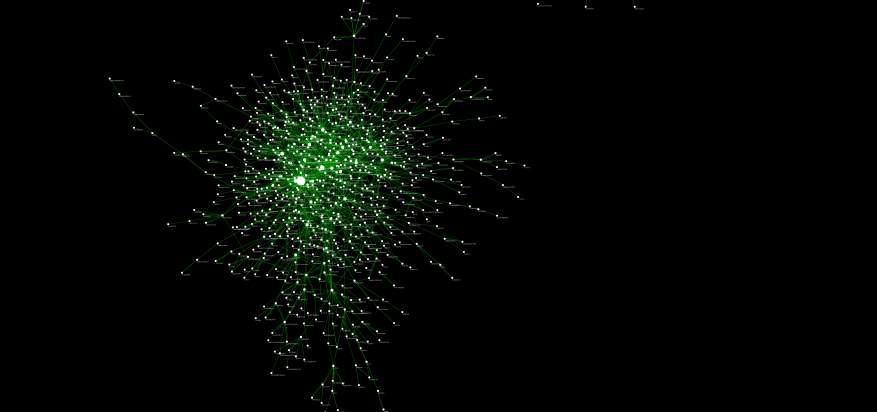

In [4]:
from IPython.display import Image
Image(filename="PrisonBreak.png", width=800)

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of edges in the subgraph (5pt)

Number of edges in the subgraph: 18


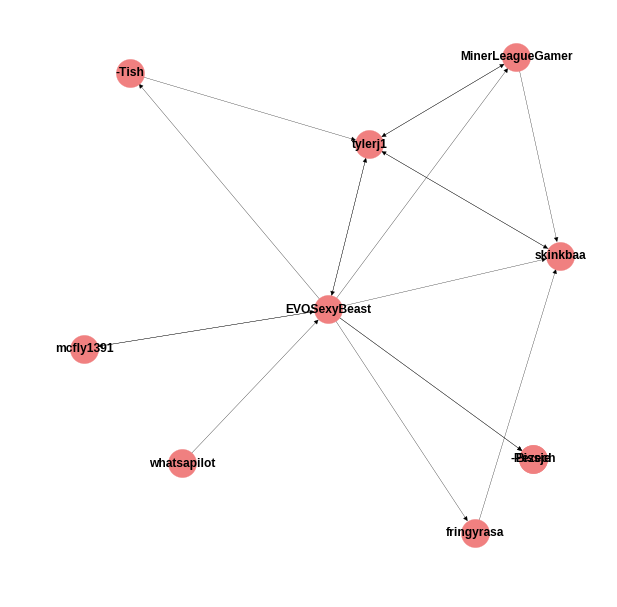

In [0]:
def get_vertex_subgraph(sg, vertex_id):
    subgraph = sg.get_neighborhood(ids=vertex_id)
    nx_subgraph = sgraph2nxDigraph(subgraph)
    plt.figure(figsize=(8,8))
    nx.draw_kamada_kawai(nx_subgraph, with_labels=True, node_size = 800, font_weight=1000, width=0.3, node_color='lightcoral')
    return subgraph
  
subgraph = get_vertex_subgraph(sg, ['EVOSexyBeast'])
print('Number of edges in the subgraph: ' + str(len(subgraph.edges)))

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [0]:
# I used google Colab and it could not handle the size of the network - so I limited the number of edges to 100000

vertices_sf = tc.load_sframe("FCIS/fcis_chess.vertices.sframe")
edges_sf = tc.load_sframe("FCIS/fcis_chess.interactions.sframe")[:100000]
sg_chess = tc.SGraph(vertices=vertices_sf, edges=edges_sf, vid_field="v_id", src_field="src_id", dst_field="dst_id")

In [0]:
# I decided to use he pagerank algorithm for calculating the centrality of the players

pr_chess = tc.pagerank.create(sg_chess)
sg_chess.vertices['pagerank'] = pr_chess['graph'].vertices['pagerank']
pagerank_top10 = sg_chess.vertices[['__id', 'pagerank']].sort(key_column_names="pagerank", ascending=False).head(10)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 441060                |

| 2         | 1561.51               |

| 3         | 749.449               |

| 4         | 452.64                |

| 5         | 292.673               |

| 6         | 196.886               |

| 7         | 137.959               |

| 8         | 98.4282               |

| 9         | 71.7632               |

| 10        | 53.1776               |

| 11        | 39.8097               |

| 12        | 30.2114               |

| 13        | 23.0625               |

| 14        | 17.777                |

| 15        | 13.751                |

| 16        | 10.7258               |

| 17        | 8.3756                |

| 18        | 6.5928                |

| 19        | 5.18796               |

| 20        | 4.11237               |

+-----------+-----------------------+

In [0]:
pagerank_top10

Columns:
	__id	str
	pagerank	float

Rows: 10

Data:
+-------------+--------------------+
|     __id    |      pagerank      |
+-------------+--------------------+
|  FriarTuck  | 39.08458331952484  |
|  Wronskian  | 38.11746309841809  |
|     mscp    | 34.340348638237636 |
|    secone   | 17.486930091847867 |
|   stupido   | 15.956844528697289 |
|     pkch    | 14.367010991166858 |
| JagorCrafty | 12.462938689968395 |
| MATTtheRATT | 11.766571141096383 |
|  RegisAlum  | 11.223712835988863 |
|     hdyl    | 10.90241315536069  |
+-------------+--------------------+
[10 rows x 2 columns]

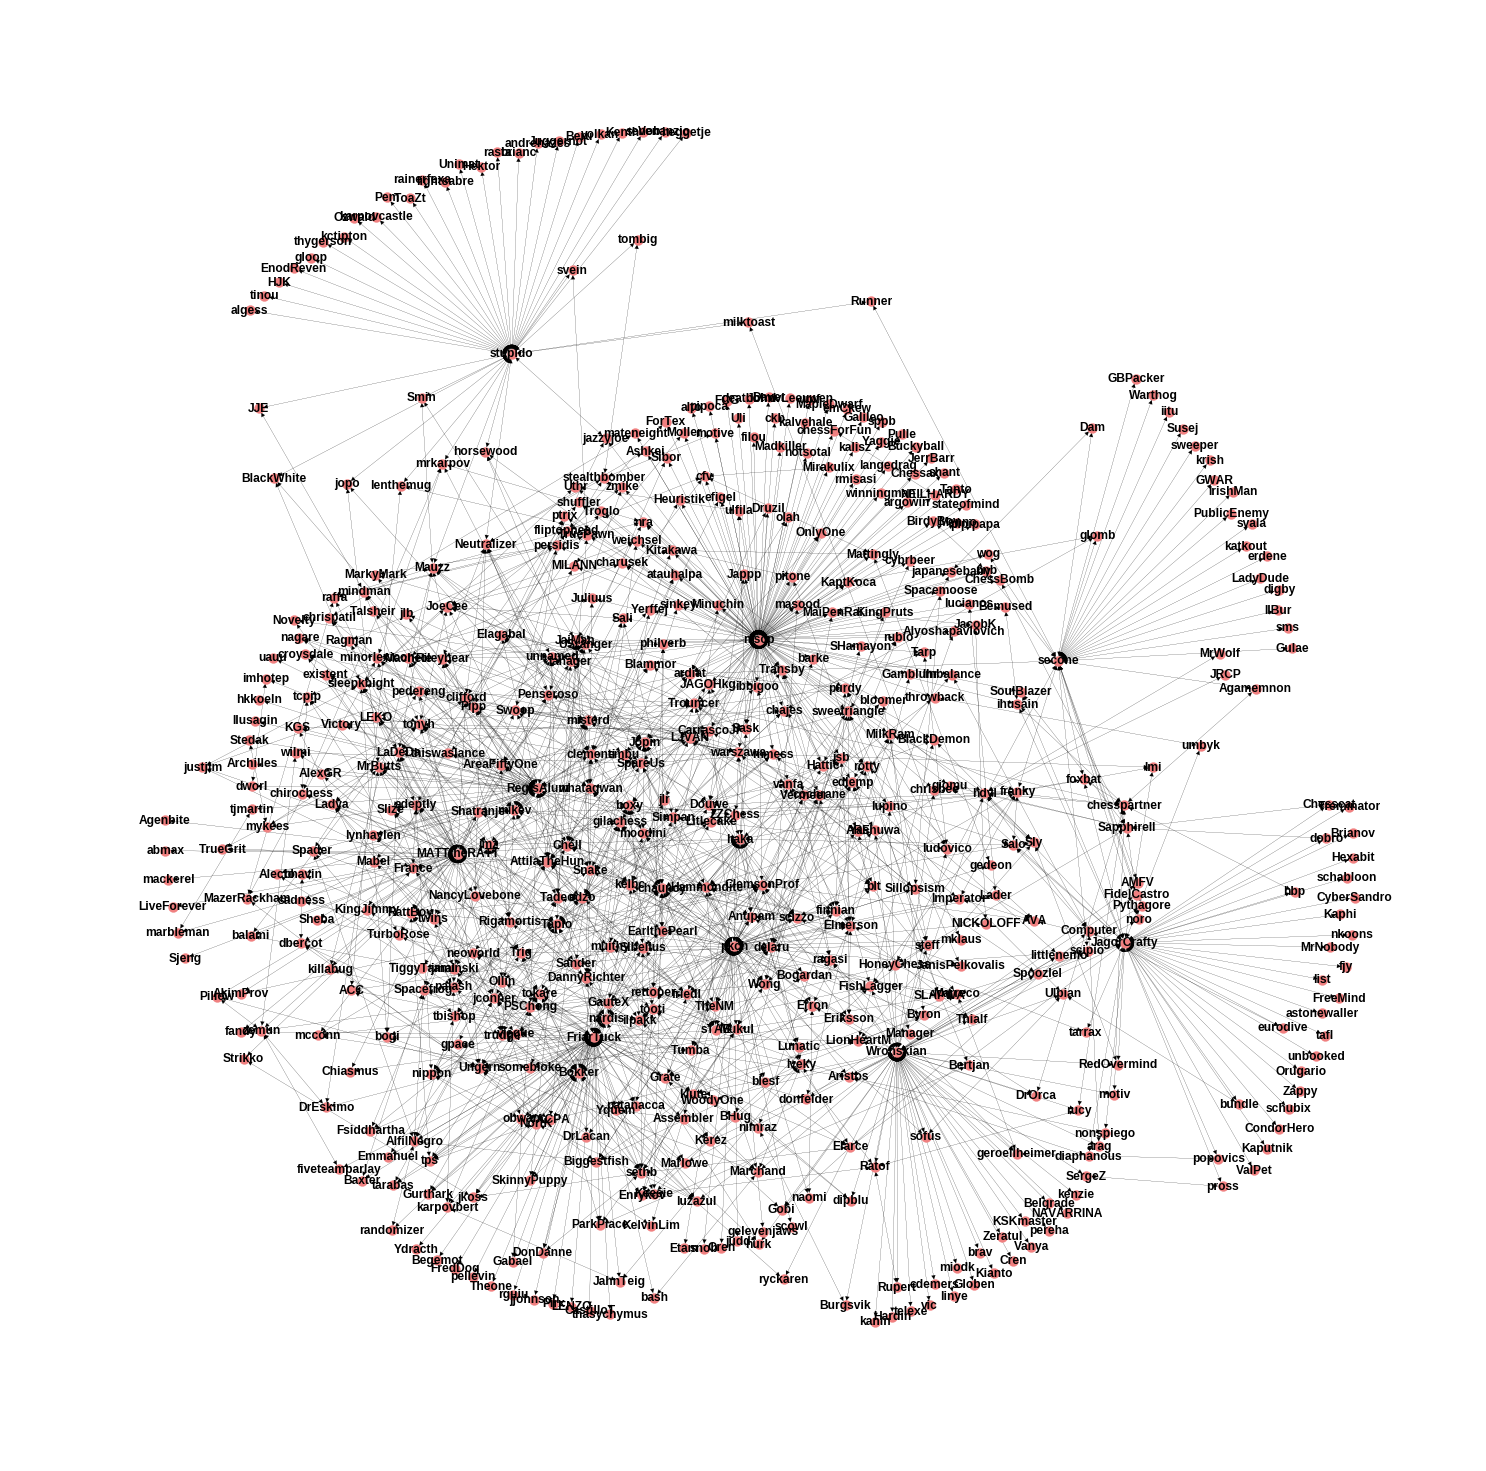

In [0]:
# I decided to visualize the neighborhood of the top 10 central players

subgraph = sg_chess.get_neighborhood(ids=list(pagerank_top10['__id']))
nx_subgraph = sgraph2nxDigraph(subgraph)
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(nx_subgraph, with_labels=True, node_size = 100, font_weight=1000, width=0.1, node_color='lightcoral')

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

**I opened the lord.gml file from lecture 2 in the Cytoscape program and did the following:**

*   Chose the BioPAX_SIF style
*   changed the nodes property - Fill Color to be of type Discrete Mapping to the column gender and chose a color to each gender
*   changed the nodes property - Shape to be of type Discrete Mapping to the column race and chose a shape to each race


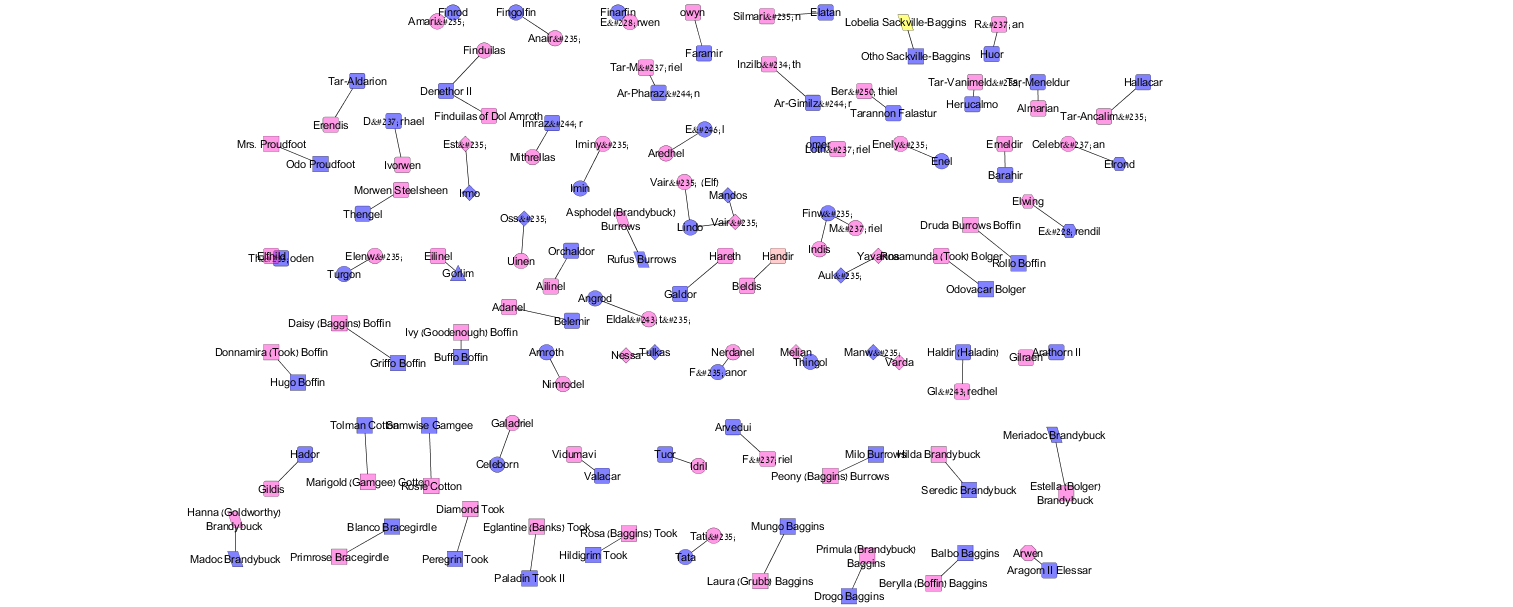

In [0]:
Image(filename="lord.png")

### Group 2

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges